# 금융분석
 * 주식 시뮬레이션 1
 * 저가에 매수 고가에 매도
 * 데일리 트레이더- 일일 매매 전략
 * 오리온(주) 테스트


In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [4]:
code=271560
pgno=2
url='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=271560&page=2'

In [14]:
def getDB():
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [15]:
res=getDB()
res[0]

['sidx', 'skey', 'sday', 'sopen', 'shigh', 'slow', 'sclose', 'svol']

In [17]:
df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864
894,20170710,2017-07-10,82300,88000,81000,88000,840451
893,20170711,2017-07-11,88000,88000,82700,82800,422303
892,20170712,2017-07-12,83700,84600,80000,83500,238407
891,20170713,2017-07-13,83400,84000,80800,81600,218138


<AxesSubplot:xlabel='sday'>

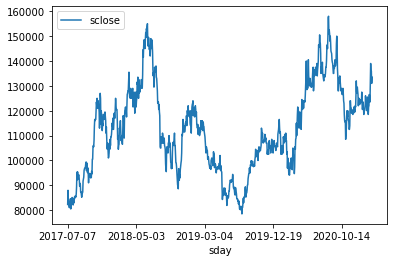

In [18]:
df.plot.line(x='sday',y='sclose')

In [24]:
cdf=df[['sday','sclose']].copy()
cdf.head()

,sday,sclose
sidx,,
895,2017-07-07,82300
894,2017-07-10,88000
893,2017-07-11,82800
892,2017-07-12,83500
891,2017-07-13,81600


In [27]:
cdf['preday']=cdf['sclose'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday
sidx,,,
895,2017-07-07,82300,0.0
894,2017-07-10,88000,82300.0
893,2017-07-11,82800,88000.0
892,2017-07-12,83500,82800.0
891,2017-07-13,81600,83500.0


In [34]:
cdf.loc[895,'sclose']>cdf.loc[895,'preday']

True

In [37]:
cdf['updown']=(cdf['sclose']>cdf['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown
sidx,,,,
895,2017-07-07,82300,0.0,1
894,2017-07-10,88000,82300.0,1
893,2017-07-11,82800,88000.0,0
892,2017-07-12,83500,82800.0,1
891,2017-07-13,81600,83500.0,0


In [39]:
cdf['preupdown']=cdf['updown'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday,updown,preupdown
sidx,,,,,
895,2017-07-07,82300,0.0,1,0.0
894,2017-07-10,88000,82300.0,1,1.0
893,2017-07-11,82800,88000.0,0,1.0
892,2017-07-12,83500,82800.0,1,0.0
891,2017-07-13,81600,83500.0,0,1.0


In [42]:
cdf['sellpos']= np.where(cdf['updown']>cdf['preupdown'],1,0)+np.where(cdf['updown']<cdf['preupdown'],-1,0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
895,2017-07-07,82300,0.0,1,0.0,1
894,2017-07-10,88000,82300.0,1,1.0,0
893,2017-07-11,82800,88000.0,0,1.0,-1
892,2017-07-12,83500,82800.0,1,0.0,1
891,2017-07-13,81600,83500.0,0,1.0,-1
